In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import the data

In [2]:
# Load the CSV file into a DataFrame
df = pd.read_csv('/Users/adong850408/DS_for_Business/AirlineReviews.csv')

df.head()

,Aircraft,AirlineName,CabinType,DateFlown,DatePub,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,...,Route,SeatComfortRating,ServiceRating,Slug,Title,TravelType,TripVerified,ValueRating,WifiRating,unique_id
0,NaN,AB Aviation,Economy Class,November 2019,11th November 2019,0,4,4,Netherlands,9.0,...,Moroni to Moheli,4,5,ab-aviation,pretty decent airline,Solo Leisure,Trip Verified,3,0,d3b260fb-268b-4399-8a9b-2804825902c6
1,E120,AB Aviation,Economy Class,June 2019,25th June 2019,0,1,1,UnitedKingdom,1.0,...,Moroni to Anjouan,2,2,ab-aviation,Not a good airline,Solo Leisure,Trip Verified,2,0,307711df-268f-4698-97b8-45729b7d972e
2,Embraer E120,AB Aviation,Economy Class,June 2019,25th June 2019,0,1,1,UnitedKingdom,1.0,...,Anjouan to Dzaoudzi,2,1,ab-aviation,flight was fortunately short,Solo Leisure,Trip Verified,2,0,82bd2602-171d-4724-bde0-90b71621cdcf
3,NaN,Aerocaribbean,Economy Class,NaN,31st December 2010,0,0,0,Denmark,8.0,...,NaN,0,0,aerocaribbean,Aerocaribbean customer review,NaN,NaN,4,0,a927beb4-6244-4f5c-9dc3-09890aa3e616
4,NaN,Aerocaribbean,NaN,NaN,25th November 2010,0,0,0,UnitedKingdom,1.0,...,NaN,0,0,aerocaribbean,Aerocaribbean customer review,NaN,NaN,0,0,d7bea425-c58a-4a7e-8269-02e0e6516633


In [3]:
df.columns

Index(['Aircraft', 'AirlineName', 'CabinType', 'DateFlown', 'DatePub',
       'EntertainmentRating', 'FoodRating', 'GroundServiceRating',
       'OriginCountry', 'OverallScore', 'Recommended', 'Review', 'Route',
       'SeatComfortRating', 'ServiceRating', 'Slug', 'Title', 'TravelType',
       'TripVerified', 'ValueRating', 'WifiRating', 'unique_id'],
      dtype='object')

### Handle the missing values

In [4]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Calculate the percentage of missing values in each column relative to the total number of rows
missing_values_percentage = round((df.isnull().sum() / len(df)) * 100, 2)

# Combine the counts and percentages into a DataFrame for a better display
missing_values_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_values_percentage
})

print(missing_values_df)

                     Missing Values  Percentage (%)
Aircraft                      93031           71.86
AirlineName                       0            0.00
CabinType                      3018            2.33
DateFlown                     38462           29.71
DatePub                           0            0.00
EntertainmentRating               0            0.00
FoodRating                        0            0.00
GroundServiceRating               0            0.00
OriginCountry                  1678            1.30
OverallScore                   4331            3.35
Recommended                       0            0.00
Review                          824            0.64
Route                         38630           29.84
SeatComfortRating                 0            0.00
ServiceRating                     0            0.00
Slug                              0            0.00
Title                             4            0.00
TravelType                    38309           29.59
TripVerified

In [5]:
# Get unique values from the 'Aircraft' column and sort them alphabetically, excluding non-string values
unique_aircrafts = sorted(set(filter(lambda x: isinstance(x, str), df['Aircraft'].unique())))
print(unique_aircrafts)

[' ', ' A320', ' A320 NEO', ' A320-200', ' A321', ' A330', ' A330 neo / A320', ' A330-200', ' A330-300 /  Boeing B777-300ER', ' A330-300 / A330-200', ' A380-800', ' Boeing 737 / A320', ' Boeing 777  A320', ' CJ-800', ' CRJ-700 / Boeing 757-200', ' E190-E2', ' EMB95', '!', '-', '....', '1 x Boeing 777  3 x A380', '1 x Boeing 777-ER  1 x A380', '1029', '1352', '1429', '2374', '319', '320', '320 Airbus', '320 bus', '320/321', '321', '32A', '330', '330-200  767-400', '332', '350 & 787', '442', '442 I believe', '452', '5J 312', '6E7131', '7', '700 Series', '707', '717', '737', '737 800', '737 800 MAX', '737 Max', '737 Max8', '737- 800', '737-300', '737-700', '737-700 800', '737-700/800', '737-800', '737-800 Max', '737-800 winglet', '737-800(VT-JTN', '737-800/A388', '737-900', '737300', '738', '747', '747 400', '747 800', '747-400', '747-400 and A380', '747-800', '757', '757-200', '767', '767-300', '767-300ER', '773ER', '777', '777 200ER', '777-200', '777-200 & 789', '777-200 and 380', '777-

In [6]:
# Handle the column 'Aircraft'

# Function to determine the manufacturer based on aircraft model name
def determine_manufacturer_corrected(aircraft_name):
    if pd.isna(aircraft_name) or not aircraft_name.strip():
        return np.nan  # Return NaN for missing or empty strings
    aircraft_name = aircraft_name.lower().strip()  # Normalize the string
    if 'boeing' in aircraft_name or aircraft_name.startswith('b') or (aircraft_name[0] == '7' and len(aircraft_name) > 1 and aircraft_name[1].isdigit()):
        return 'Boeing'
    elif 'airbus' in aircraft_name or aircraft_name.startswith('a') or (aircraft_name[0] == '3' and len(aircraft_name) > 1 and aircraft_name[1].isdigit()):
        return 'Airbus'
    elif 'embraer' in aircraft_name or ('e' in aircraft_name and 'embraer' not in aircraft_name):
        return 'Embraer'
    elif 'bombardier' in aircraft_name or 'dash' in aircraft_name or 'crj' in aircraft_name:
        return 'Bombardier'
    else:
        return np.nan  # Return NaN for models not matching any known manufacturer or criteria

# Apply the corrected function to the dataset
df['Aircraft Manufacturer'] = df['Aircraft'].apply(determine_manufacturer_corrected)

# Recalculate the proportions of each manufacturer
corrected_manufacturer_proportions = df['Aircraft Manufacturer'].dropna().value_counts(normalize=True)

# Fill NaN values in 'Aircraft Manufacturer' based on the new proportions
manufacturers_corrected = corrected_manufacturer_proportions.index.tolist()
proportions_corrected = corrected_manufacturer_proportions.values.tolist()

missing_manufacturers_corrected = np.random.choice(manufacturers_corrected, size=df['Aircraft Manufacturer'].isna().sum(), p=proportions_corrected)
df.loc[df['Aircraft Manufacturer'].isna(), 'Aircraft Manufacturer'] = missing_manufacturers_corrected

# Display corrected proportions and verify there are no NaN values left
corrected_manufacturer_proportions, df['Aircraft Manufacturer'].isna().sum()


(Boeing        0.500738
 Airbus        0.462871
 Embraer       0.028456
 Bombardier    0.007935
 Name: Aircraft Manufacturer, dtype: float64,
 0)

In [7]:
df.head()

,Aircraft,AirlineName,CabinType,DateFlown,DatePub,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,...,SeatComfortRating,ServiceRating,Slug,Title,TravelType,TripVerified,ValueRating,WifiRating,unique_id,Aircraft Manufacturer
0,NaN,AB Aviation,Economy Class,November 2019,11th November 2019,0,4,4,Netherlands,9.0,...,4,5,ab-aviation,pretty decent airline,Solo Leisure,Trip Verified,3,0,d3b260fb-268b-4399-8a9b-2804825902c6,Airbus
1,E120,AB Aviation,Economy Class,June 2019,25th June 2019,0,1,1,UnitedKingdom,1.0,...,2,2,ab-aviation,Not a good airline,Solo Leisure,Trip Verified,2,0,307711df-268f-4698-97b8-45729b7d972e,Embraer
2,Embraer E120,AB Aviation,Economy Class,June 2019,25th June 2019,0,1,1,UnitedKingdom,1.0,...,2,1,ab-aviation,flight was fortunately short,Solo Leisure,Trip Verified,2,0,82bd2602-171d-4724-bde0-90b71621cdcf,Embraer
3,NaN,Aerocaribbean,Economy Class,NaN,31st December 2010,0,0,0,Denmark,8.0,...,0,0,aerocaribbean,Aerocaribbean customer review,NaN,NaN,4,0,a927beb4-6244-4f5c-9dc3-09890aa3e616,Boeing
4,NaN,Aerocaribbean,NaN,NaN,25th November 2010,0,0,0,UnitedKingdom,1.0,...,0,0,aerocaribbean,Aerocaribbean customer review,NaN,NaN,0,0,d7bea425-c58a-4a7e-8269-02e0e6516633,Boeing


In [8]:
# Drop the 'Aircraft' column from the dataframe
df = df.drop('Aircraft', axis=1)

# Verify the column is dropped by displaying the first few rows of the dataframe
df.head()

,AirlineName,CabinType,DateFlown,DatePub,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,Recommended,...,SeatComfortRating,ServiceRating,Slug,Title,TravelType,TripVerified,ValueRating,WifiRating,unique_id,Aircraft Manufacturer
0,AB Aviation,Economy Class,November 2019,11th November 2019,0,4,4,Netherlands,9.0,yes,...,4,5,ab-aviation,pretty decent airline,Solo Leisure,Trip Verified,3,0,d3b260fb-268b-4399-8a9b-2804825902c6,Airbus
1,AB Aviation,Economy Class,June 2019,25th June 2019,0,1,1,UnitedKingdom,1.0,no,...,2,2,ab-aviation,Not a good airline,Solo Leisure,Trip Verified,2,0,307711df-268f-4698-97b8-45729b7d972e,Embraer
2,AB Aviation,Economy Class,June 2019,25th June 2019,0,1,1,UnitedKingdom,1.0,no,...,2,1,ab-aviation,flight was fortunately short,Solo Leisure,Trip Verified,2,0,82bd2602-171d-4724-bde0-90b71621cdcf,Embraer
3,Aerocaribbean,Economy Class,NaN,31st December 2010,0,0,0,Denmark,8.0,yes,...,0,0,aerocaribbean,Aerocaribbean customer review,NaN,NaN,4,0,a927beb4-6244-4f5c-9dc3-09890aa3e616,Boeing
4,Aerocaribbean,NaN,NaN,25th November 2010,0,0,0,UnitedKingdom,1.0,no,...,0,0,aerocaribbean,Aerocaribbean customer review,NaN,NaN,0,0,d7bea425-c58a-4a7e-8269-02e0e6516633,Boeing


In [9]:
# Fill missing values for categorical columns with the mode'
categorical_columns = ['CabinType','OriginCountry', 'Route', 'TravelType']
for column in categorical_columns:
    mode = df[column].mode()[0]
    df[column].fillna(mode, inplace=True)
    
    
# Standardize 'TripVerified' column and impute missing values based on existing distribution
df['TripVerified'] = df['TripVerified'].replace({'Trip Verified, Trip Verified': 'Trip Verified', 
                                                  'Trip Verified,Trip Verified': 'Trip Verified', 
                                                  'Not Verified, Not Verified': 'Not Verified', 
                                                  'Chicago to Colorado Springs. Not Verified': 'Not Verified', 
                                                  'NotVerified': 'Not Verified'})

trip_verified_ratio = df['TripVerified'].value_counts(normalize=True)

missing_trip_verified = df['TripVerified'].isnull().sum()

df.loc[df['TripVerified'].isnull(), 'TripVerified'] = np.random.choice(trip_verified_ratio.index, 
                                                                       size=missing_trip_verified, 
                                                                       p=trip_verified_ratio.values)

# Fill missing values in 'OverallScore' with the median
overall_score_median = df['OverallScore'].median()
df['OverallScore'].fillna(overall_score_median, inplace=True)


# Drop rows with missing values in 'Review' and 'OriginCountry'
df.dropna(subset=['Review', 'OriginCountry'], inplace=True)


# Format 'DatePub' to yyyy/mm/dd
df['DatePub'] = pd.to_datetime(df['DatePub']).dt.strftime('%Y/%m/%d')


# Format 'DateFlown' to yyyy/mm and impute missing values using 'DatePub' year and month
df['DateFlown'] = pd.to_datetime(df['DateFlown'], errors='coerce').dt.to_period('M')
df['DatePubYearMonth'] = pd.to_datetime(df['DatePub']).dt.to_period('M')
df['DateFlown'].fillna(df['DatePubYearMonth'], inplace=True)
df.drop(columns=['DatePubYearMonth'], inplace=True)  # Clean up temporary column


In [10]:
# Split the 'Route' column into 'Departure' and 'Destination' based on the ' to ' delimiter
df['Route_Departure'], df['Route_Destination'] = df['Route'].str.split(' to ', 1).str

# Drop the 'route' column from the dataframe
df.drop('Route', axis=1, inplace=True)

/var/folders/9w/s6ctl55n5k13bk47fx4h25340000gn/T/ipykernel_59317/3483610645.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['Route_Departure'], df['Route_Destination'] = df['Route'].str.split(' to ', 1).str


In [11]:
# Display the first few rows to confirm changes
df.head()

,AirlineName,CabinType,DateFlown,DatePub,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,Recommended,...,Slug,Title,TravelType,TripVerified,ValueRating,WifiRating,unique_id,Aircraft Manufacturer,Route_Departure,Route_Destination
0,AB Aviation,Economy Class,2019-11,2019/11/11,0,4,4,Netherlands,9.0,yes,...,ab-aviation,pretty decent airline,Solo Leisure,Trip Verified,3,0,d3b260fb-268b-4399-8a9b-2804825902c6,Airbus,Moroni,Moheli
1,AB Aviation,Economy Class,2019-06,2019/06/25,0,1,1,UnitedKingdom,1.0,no,...,ab-aviation,Not a good airline,Solo Leisure,Trip Verified,2,0,307711df-268f-4698-97b8-45729b7d972e,Embraer,Moroni,Anjouan
2,AB Aviation,Economy Class,2019-06,2019/06/25,0,1,1,UnitedKingdom,1.0,no,...,ab-aviation,flight was fortunately short,Solo Leisure,Trip Verified,2,0,82bd2602-171d-4724-bde0-90b71621cdcf,Embraer,Anjouan,Dzaoudzi
3,Aerocaribbean,Economy Class,2010-12,2010/12/31,0,0,0,Denmark,8.0,yes,...,aerocaribbean,Aerocaribbean customer review,Solo Leisure,Trip Verified,4,0,a927beb4-6244-4f5c-9dc3-09890aa3e616,Boeing,Sydney,Melbourne
4,Aerocaribbean,Economy Class,2010-11,2010/11/25,0,0,0,UnitedKingdom,1.0,no,...,aerocaribbean,Aerocaribbean customer review,Solo Leisure,Trip Verified,0,0,d7bea425-c58a-4a7e-8269-02e0e6516633,Boeing,Sydney,Melbourne


### Find the airlines of their overall rating is decreasing over time

In [12]:
# Ensure 'DatePub' is a datetime column
df['DatePub'] = pd.to_datetime(df['DatePub'], errors='coerce')

# Group data by 'AirlineName' and 'DatePub' year to calculate the mean 'OverallScore'
df_grouped = df.groupby(['AirlineName', df['DatePub'].dt.year])['OverallScore'].mean().reset_index()

# Identify airlines whose overall rating is decreasing over time
airlines_decreasing_trend = []

# Iterate through each airline to check if their overall rating is decreasing over time
for airline in df_grouped['AirlineName'].unique():
    df_airline = df_grouped[df_grouped['AirlineName'] == airline].sort_values(by='DatePub')
    if df_airline['OverallScore'].is_monotonic_decreasing:
        airlines_decreasing_trend.append(airline)

airlines_decreasing_trend

['AB Aviation',
 'ATA Airlines',
 'AeroItalia',
 'Air Antilles',
 'Air Burkina',
 'Air Costa',
 "Air Cote d'Ivoire",
 'Air Iceland Connect',
 'Air Labrador',
 'Air Malawi',
 'Air Rarotonga',
 'Alliance Air',
 'Andes Líneas Aéreas',
 'Ariana Afghan Airlines',
 'Armenia Air Company',
 'Auric Air',
 'Avelo Airlines',
 'Azur Air Germany',
 'Badr Airlines',
 'Bluebird Airways',
 'BoraJet',
 'Breeze Airways',
 'Buraq Air',
 'Camair-Co',
 'Cambodia Bayon Airlines',
 'Cobalt',
 'Dimonim Air',
 'Dynamic International Airways',
 'EWA Air',
 'Eastern Airlines',
 'Ernest Airlines',
 'Europe Airpost',
 'Evelop Airlines',
 'FLYONE',
 'FMI Air',
 'FlyArystan',
 'Go First',
 'Golden Myanmar Airlines',
 'Grand Cru Airlines',
 'Greater Bay Airlines',
 'Henan Airlines',
 'HiSky',
 'Himalaya Airlines',
 'Hunnu Air',
 'JC International Airlines',
 'JetsuiteX',
 'Jordan Aviation',
 'KD Air',
 'Kan Air',
 'LC Perú',
 'Lao Airlines',
 'Lubeck Air',
 'Lynx Air',
 'MAYAir',
 'MEGA Maldives Airlines',
 'Mack Air

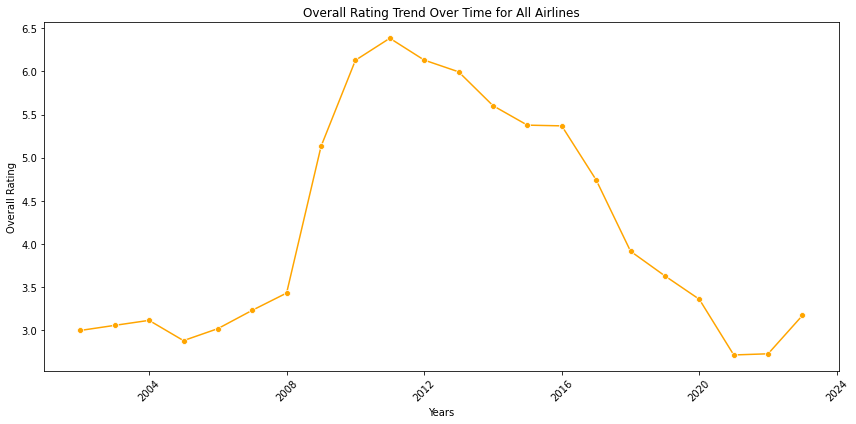

In [13]:
# Convert 'DatePub' to datetime format to facilitate grouping
df['DatePub'] = pd.to_datetime(df['DatePub'], errors='coerce')

# Group the dataset by year and calculate the mean 'OverallScore'
df_overall_trend = df.groupby(df['DatePub'].dt.to_period('Y'))['OverallScore'].mean().reset_index()

# Convert 'DatePub' from Period to datetime for plotting
df_overall_trend['DatePub'] = df_overall_trend['DatePub'].dt.to_timestamp()

# Plot the trend of 'OverallScore' over time for all airlines combined
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_overall_trend, x='DatePub', y='OverallScore', marker='o', color='orange')
plt.title('Overall Rating Trend Over Time for All Airlines')
plt.xlabel('Years')
plt.ylabel('Overall Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Select the airline with the most data points among all airlines whose overall ratings have declined over time for analysis.

/var/folders/9w/s6ctl55n5k13bk47fx4h25340000gn/T/ipykernel_59317/1817190671.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_airline['DatePub'] = pd.to_datetime(df_selected_airline['DatePub'], errors='coerce')


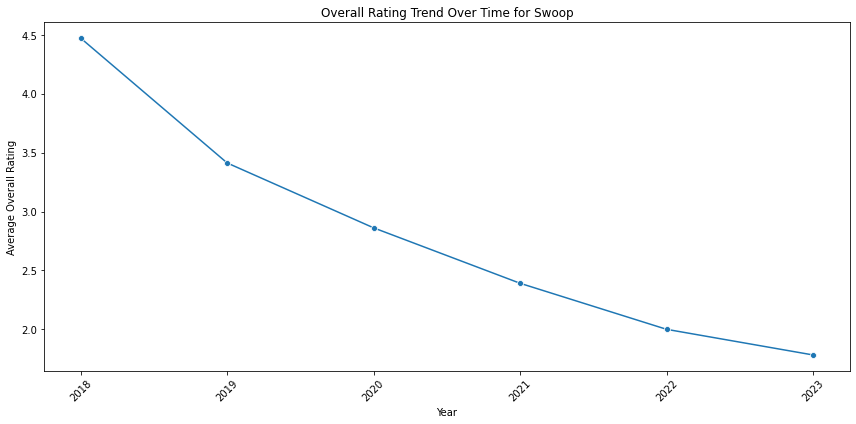

In [14]:
# Calculate the number of data points for each airline in the decreasing trend list
data_points_per_airline = df[df['AirlineName'].isin(airlines_decreasing_trend)]['AirlineName'].value_counts()

# Find the airline with the most data points from the decreasing trend list
airline_most_data_decreasing = data_points_per_airline.idxmax()

# Filter the DataFrame for the selected airline
df_selected_airline = df[df['AirlineName'] == airline_most_data_decreasing]

# Ensure 'DatePub' is a datetime column for grouping
df_selected_airline['DatePub'] = pd.to_datetime(df_selected_airline['DatePub'], errors='coerce')

# Group by year and calculate mean 'OverallScore'
df_selected_trend = df_selected_airline.groupby(df_selected_airline['DatePub'].dt.to_period('Y'))['OverallScore'].mean().reset_index()


# Convert 'DatePub' from Period to datetime for plotting
df_selected_trend['DatePub'] = df_selected_trend['DatePub'].dt.to_timestamp()

# Plot the trend of 'OverallScore' over time for the selected airline
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_selected_trend, x='DatePub', y='OverallScore', marker='o')
plt.title(f'Overall Rating Trend Over Time for {airline_most_data_decreasing}')
plt.xlabel('Year')
plt.ylabel('Average Overall Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
# Correct the DatePub conversion to datetime format for the entire dataset
df['DatePub'] = pd.to_datetime(df['DatePub'], errors='coerce')

# Calculate the number of data points for each airline in the decreasing trend list
data_points_per_airline = df[df['AirlineName'].isin(airlines_decreasing_trend)]['AirlineName'].value_counts()


# Correct the DatePub conversion to datetime format for the entire dataset
df['DatePub'] = pd.to_datetime(df['DatePub'], errors='coerce')

# Calculate the number of data points for each airline in the decreasing trend list
data_points_per_airline = df[df['AirlineName'].isin(airlines_decreasing_trend)]['AirlineName'].value_counts()

# Find the airline with the most data points from the decreasing trend list
airline_most_data_decreasing = data_points_per_airline.idxmax()


print(f"{airline_most_data_decreasing} has the most data with {len(df_selected_airline)} points among all airlines whose overall ratings have declined over time")

Swoop has the most data with 701 points among all airlines whose overall ratings have declined over time


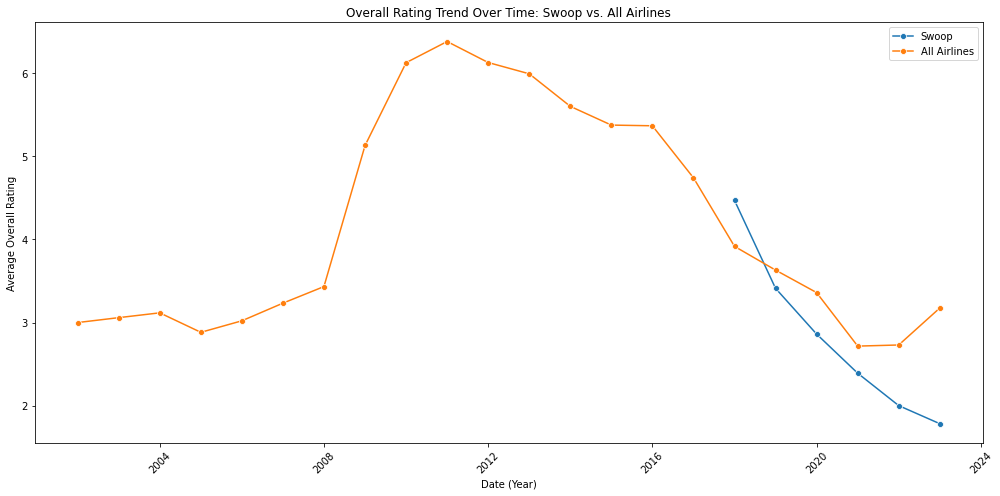

In [16]:
# Filter the DataFrame for the selected airline
df_selected_airline = df[df['AirlineName'] == airline_most_data_decreasing]

# Group the selected airline's data by year and quarter to calculate the mean 'OverallScore'
df_selected_trend = df_selected_airline.groupby(df_selected_airline['DatePub'].dt.to_period('Y'))['OverallScore'].mean().reset_index()
df_selected_trend['DatePub'] = df_selected_trend['DatePub'].dt.to_timestamp()

# Group the overall data by year and quarter to calculate the mean 'OverallScore' for all airlines
df_overall_trend_all = df.groupby(df['DatePub'].dt.to_period('Y'))['OverallScore'].mean().reset_index()
df_overall_trend_all['DatePub'] = df_overall_trend_all['DatePub'].dt.to_timestamp()

# Now let's plot both trends: Selected airline vs. All airlines
plt.figure(figsize=(14, 7))

# Plot for the selected airline
sns.lineplot(data=df_selected_trend, x='DatePub', y='OverallScore', marker='o', label=airline_most_data_decreasing)

# Plot for all airlines
sns.lineplot(data=df_overall_trend_all, x='DatePub', y='OverallScore', marker='o', label='All Airlines')

plt.title(f'Overall Rating Trend Over Time: {airline_most_data_decreasing} vs. All Airlines')
plt.xlabel('Date (Year)')
plt.ylabel('Average Overall Rating')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


### EDA

### Apply a Model and Evaluation